# 3.33-图像抖动-Floyd–Steinberg算法

In [1]:
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [3]:
def find_closest_palette_color(oldpixel):
    return np.round(oldpixel / 255)

In [8]:
def dithering(src):
    rows,cols = src.shape[0],src.shape[1]
    srcf = np.float32(src)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(srcf,cv2.COLOR_GRAY2RGB)
    dst = np.zeros_like(srcf)
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            oldpixel = srcf[i,j]
            newpixel = find_closest_palette_color(oldpixel)
            dst[i,j] = newpixel
            quant_error  = oldpixel - newpixel
            dst[i + 1,j] = srcf[i + 1,j] + quant_error * 7 / 16
            dst[i - 1,j + 1] = srcf[i - 1,j + 1] + quant_error * 3 / 16
            dst[i    ,j + 1] = srcf[i    ,j + 1] + quant_error * 5 / 16
            dst[i + 1,j + 1] = srcf[i + 1,j + 1] + quant_error * 1 / 16
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [5]:
dst = dithering(src)

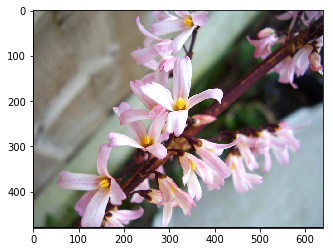

In [6]:
plt.imshow(dst)

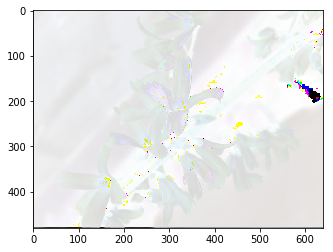

In [7]:
diff = src - dst
diff[diff < 0] = 0
plt.imshow(diff)

参考：

[1]. https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering